PDF OF SENTINEL DATA

Urban area of gdansk - stare miasto

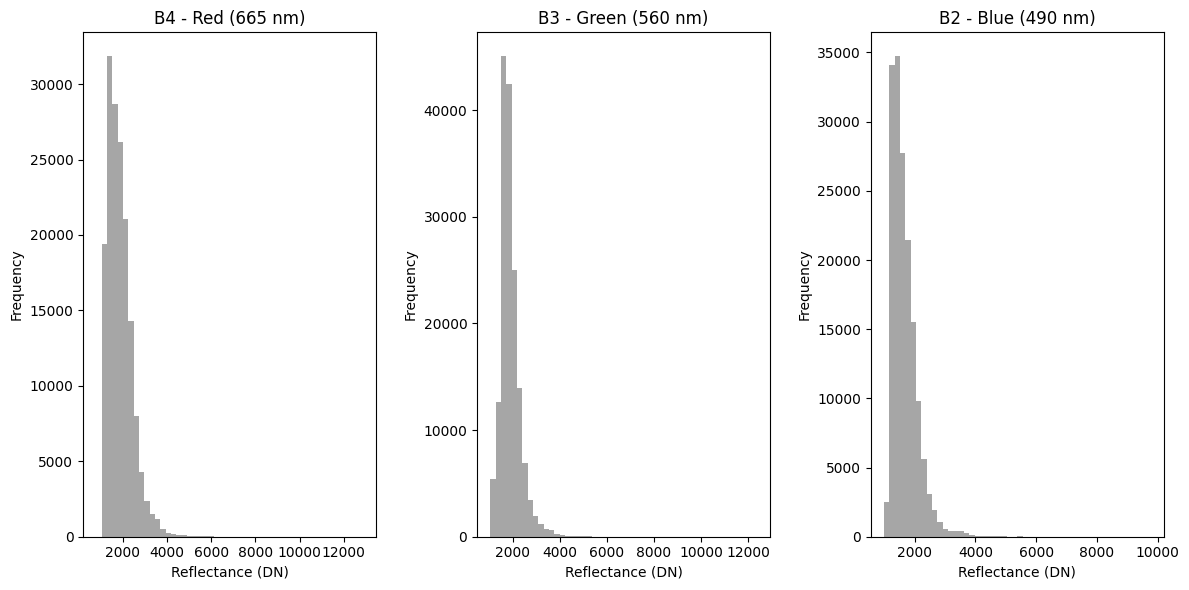

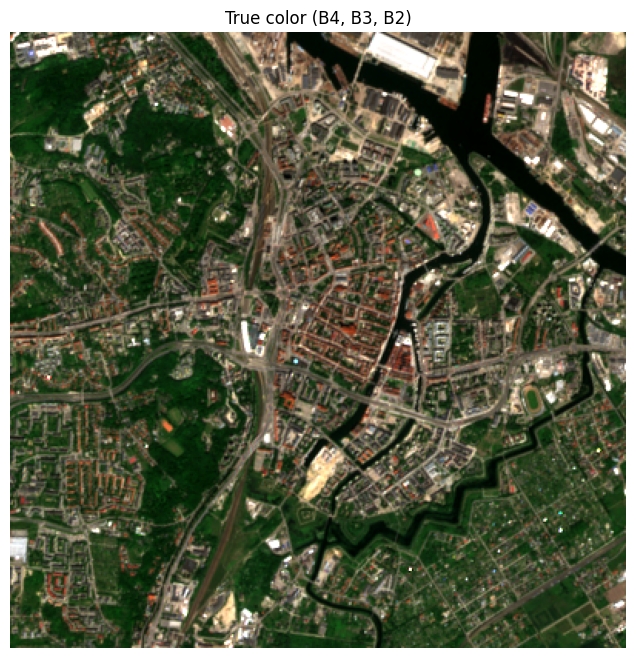

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

b2_path = r"T34UCF~2.JP2"
b3_path = r"T34UCF~3.JP2"
b4_path = r"T34UCF~4.JP2"

lon, lat = 18.649891, 54.349216  # Gdańsk - Stare Miasto
dx, dy = 2000, 2000


with rasterio.open(b4_path) as src:
    crs_raster = src.crs or "EPSG:4326"
    transform = src.transform
    bounds = src.bounds

    if crs_raster.to_string() != "EPSG:4326":
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)
        x, y = transformer.transform(lon, lat)
    else:
        x, y = lon, lat

def point_in_bounds(x, y, bounds):
    xmin, ymin, xmax, ymax = bounds
    return (xmin <= x <= xmax) and (ymin <= y <= ymax)

if not point_in_bounds(x, y, bounds):
    cx = (bounds.left + bounds.right) / 2
    cy = (bounds.top + bounds.bottom) / 2
    x, y = cx, cy

xmin, ymin, xmax, ymax = x - dx, y - dy, x + dx, y + dy
win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
win = Window(int(round(win.col_off)), int(round(win.row_off)),
             int(round(win.width)), int(round(win.height)))

with rasterio.open(b4_path) as r: b4 = r.read(1, window=win)
with rasterio.open(b3_path) as g: b3 = g.read(1, window=win)
with rasterio.open(b2_path) as b: b2 = b.read(1, window=win)

bands = [b4, b3, b2]
names = ["B4 - Red (665 nm)", "B3 - Green (560 nm)", "B2 - Blue (490 nm)"]

plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
    plt.xlabel("Reflectance (DN)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

rgb = np.dstack([b4, b3, b2]).astype(float)
rgb_min, rgb_max = np.percentile(rgb, (1, 99))
rgb = np.clip((rgb - rgb_min) / (rgb_max - rgb_min), 0, 1)

plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("True color (B4, B3, B2)")
plt.axis("off")
plt.show()


In [ ]:
#%pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 94.1 MB/s eta 0:00:00


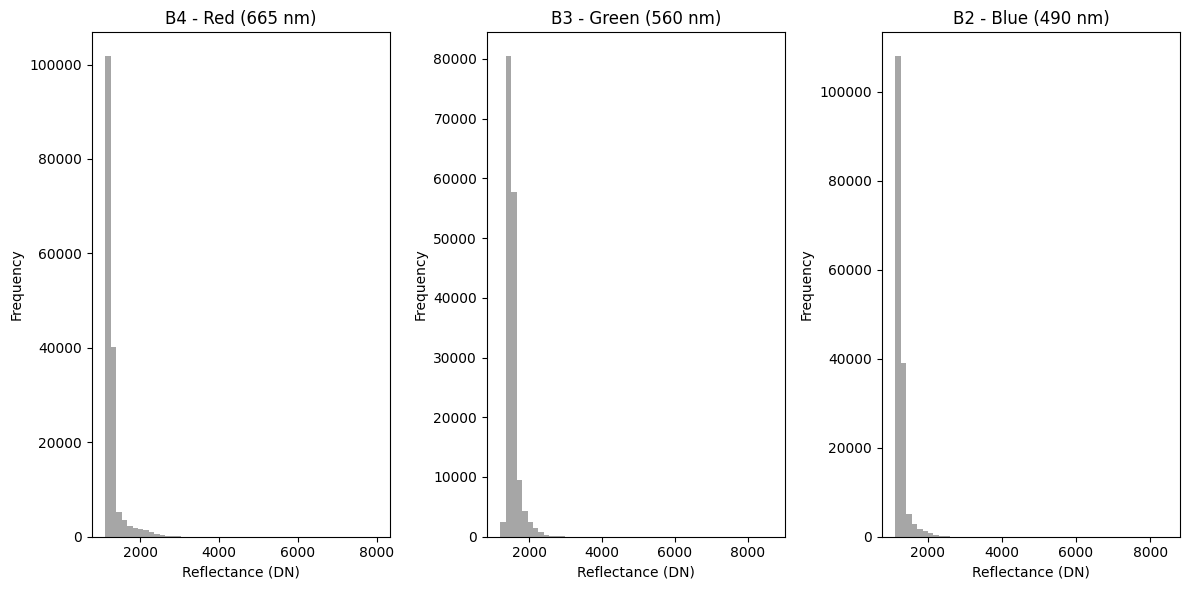

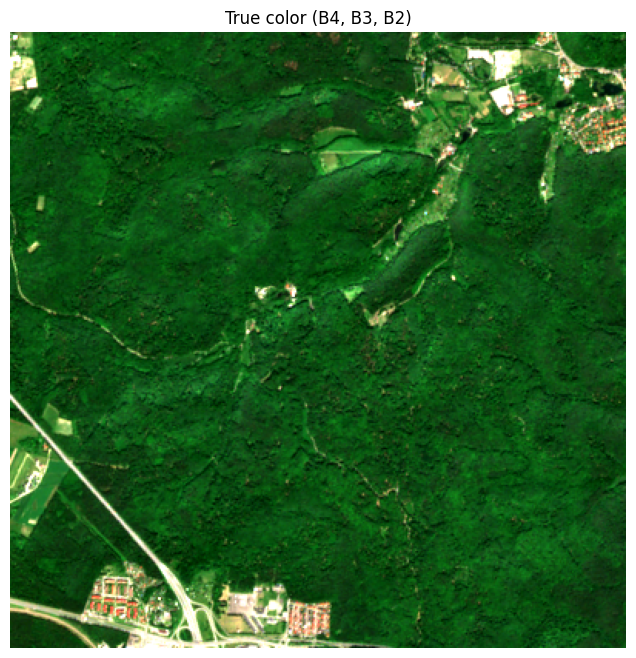

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

b2_path = r"T34UCF~2.JP2"
b3_path = r"T34UCF~3.JP2"
b4_path = r"T34UCF~4.JP2"

lon, lat =  18.524791, 54.394025
dx, dy = 2000, 2000

with rasterio.open(b4_path) as src:
    crs_raster = src.crs or "EPSG:4326"
    transform = src.transform
    bounds = src.bounds
    if crs_raster.to_string() != "EPSG:4326":
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)
        x, y = transformer.transform(lon, lat)
    else:
        x, y = lon, lat

def point_in_bounds(x, y, bounds):
    xmin, ymin, xmax, ymax = bounds
    return (xmin <= x <= xmax) and (ymin <= y <= ymax)

if not point_in_bounds(x, y, bounds):
    cx = (bounds.left + bounds.right) / 2
    cy = (bounds.top + bounds.bottom) / 2
    x, y = cx, cy

xmin, ymin, xmax, ymax = x - dx, y - dy, x + dx, y + dy
win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
win = Window(int(round(win.col_off)), int(round(win.row_off)),
             int(round(win.width)), int(round(win.height)))

with rasterio.open(b4_path) as r: b4 = r.read(1, window=win)
with rasterio.open(b3_path) as g: b3 = g.read(1, window=win)
with rasterio.open(b2_path) as b: b2 = b.read(1, window=win)

bands = [b4, b3, b2]
names = ["B4 - Red (665 nm)", "B3 - Green (560 nm)", "B2 - Blue (490 nm)"]

plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
    plt.xlabel("Reflectance (DN)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

rgb = np.dstack([b4, b3, b2]).astype(float)
rgb_min, rgb_max = np.percentile(rgb, (1, 99))
rgb = np.clip((rgb - rgb_min) / (rgb_max - rgb_min), 0, 1)

plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("True color (B4, B3, B2)")
plt.axis("off")
plt.show()


The Sentinel-2 band histograms are skewed toward lower DN values, reflecting the dominance of vegetation, soil, and shaded areas with moderate reflectance.
Blue (B2) and Green (B3) bands show a wider spread in natural regions, while the Red (B4) band peaks lower due to vegetation absorption.
In urban areas, band distributions become more similar.
Overall, the histograms highlight that Sentinel-2 reflectance is non-uniform, with most natural surfaces clustering in specific DN ranges — useful for assessing contrast and normalization.

S1 - Gdansk downtown area

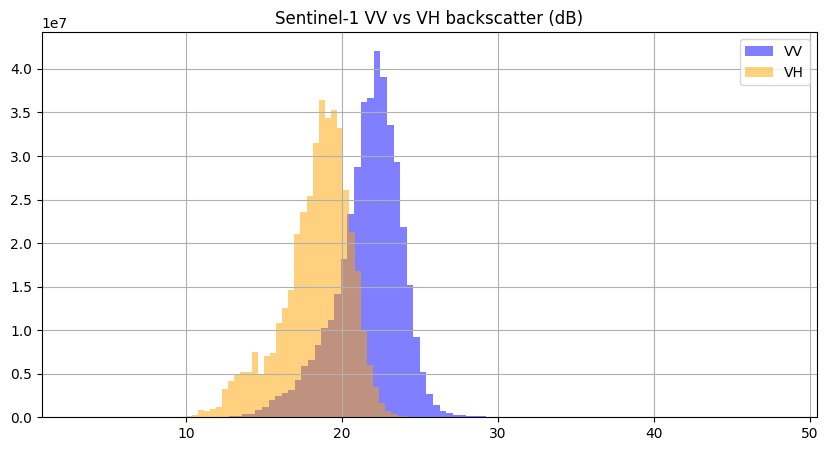

In [28]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

lon, lat = 18.649891, 54.349216
dx, dy = 2000, 2000

s1_file_vv = r"S1C-IW~2.TIF"
s1_file_vh = r"S1C-IW~1.TIF"

def read_window(path, lon, lat, dx, dy):
    with rasterio.open(path) as src:
        crs_raster = src.crs or "EPSG:4326"
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)
        x, y = transformer.transform(lon, lat)
        transform = src.transform
        W, H = src.width, src.height

        if abs(transform.a) < 0.001:
            dx_deg = dx / 111320
            dy_deg = dy / 111320
        else:
            dx_deg = dx
            dy_deg = dy

        xmin, ymin, xmax, ymax = x - dx_deg, y - dy_deg, x + dx_deg, y + dy_deg

        try:
            win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
        except Exception:
            rleft, rbottom, rright, rtop = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
            xmin = max(xmin, rleft)
            xmax = min(xmax, rright)
            ymin = max(ymin, rbottom)
            ymax = min(ymax, rtop)
            if xmin >= xmax or ymin >= ymax:
                win = Window(0, 0, W, H)
            else:
                win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)

        col_off = int(np.floor(win.col_off))
        row_off = int(np.floor(win.row_off))
        width = int(np.ceil(win.width))
        height = int(np.ceil(win.height))

        col_off = max(0, min(col_off, max(0, W - 1)))
        row_off = max(0, min(row_off, max(0, H - 1)))
        width = max(0, min(width, W - col_off))
        height = max(0, min(height, H - row_off))

        if width == 0 or height == 0:
            return np.empty((0, 0), dtype=np.float32), crs_raster

        win = Window(col_off, row_off, width, height)
        arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)
        arr[arr <= 0] = np.nan
        return arr, crs_raster

s1_img_vv, crs_vv = read_window(s1_file_vv, lon, lat, dx, dy)
s1_img_vh, crs_vh = read_window(s1_file_vh, lon, lat, dx, dy)

if s1_img_vv.size == 0 and s1_img_vh.size > 0:
    s1_img_vv = np.full_like(s1_img_vh, np.nan)
elif s1_img_vh.size == 0 and s1_img_vv.size > 0:
    s1_img_vh = np.full_like(s1_img_vv, np.nan)
elif s1_img_vv.size == 0 and s1_img_vh.size == 0:
    raise RuntimeError("Both loaded windows are empty. Check coordinates and input files.")

s1_db_vv = 10 * np.log10(s1_img_vv)
s1_db_vh = 10 * np.log10(s1_img_vh)

plt.figure(figsize=(10, 5))
plt.hist(np.ravel(s1_db_vv[~np.isnan(s1_db_vv)]), bins=100, color="blue", alpha=0.5, label="VV")
plt.hist(np.ravel(s1_db_vh[~np.isnan(s1_db_vh)]), bins=100, color="orange", alpha=0.5, label="VH")
plt.title("Sentinel-1 VV vs VH backscatter (dB)")
plt.legend()
plt.grid(True)
plt.show()


Sentinel 1 - Gdansk forest area


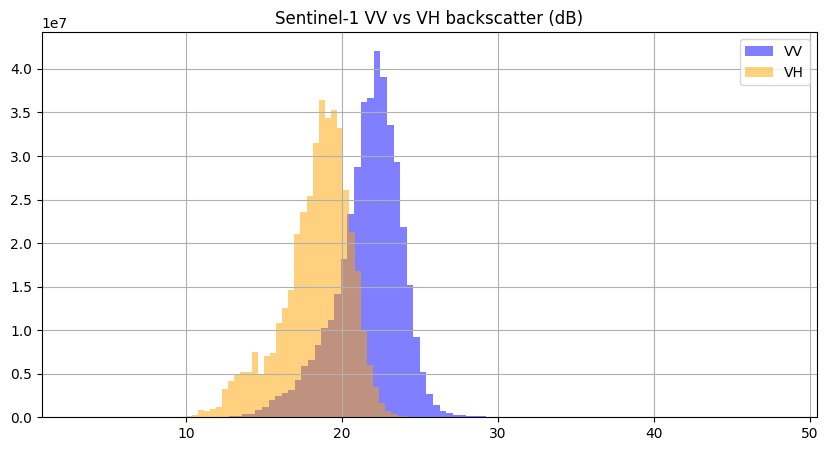

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

lon, lat =  18.524791, 54.394025
dx, dy = 2000, 2000

s1_file_vv = r"S1C-IW~2.TIF"
s1_file_vh = r"S1C-IW~1.TIF"

def read_window(path, lon, lat, dx, dy):
    with rasterio.open(path) as src:
        crs_raster = src.crs or "EPSG:4326"
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)
        x, y = transformer.transform(lon, lat)
        transform = src.transform
        W, H = src.width, src.height

        if abs(transform.a) < 0.001:
            dx_deg = dx / 111320
            dy_deg = dy / 111320
        else:
            dx_deg = dx
            dy_deg = dy

        xmin, ymin, xmax, ymax = x - dx_deg, y - dy_deg, x + dx_deg, y + dy_deg

        try:
            win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
        except Exception:
            rleft, rbottom, rright, rtop = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
            xmin = max(xmin, rleft)
            xmax = min(xmax, rright)
            ymin = max(ymin, rbottom)
            ymax = min(ymax, rtop)
            if xmin >= xmax or ymin >= ymax:
                win = Window(0, 0, W, H)
            else:
                win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)

        col_off = int(np.floor(win.col_off))
        row_off = int(np.floor(win.row_off))
        width = int(np.ceil(win.width))
        height = int(np.ceil(win.height))

        col_off = max(0, min(col_off, max(0, W - 1)))
        row_off = max(0, min(row_off, max(0, H - 1)))
        width = max(0, min(width, W - col_off))
        height = max(0, min(height, H - row_off))

        if width == 0 or height == 0:
            return np.empty((0, 0), dtype=np.float32), crs_raster

        win = Window(col_off, row_off, width, height)
        arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)
        arr[arr <= 0] = np.nan
        return arr, crs_raster

s1_img_vv, crs_vv = read_window(s1_file_vv, lon, lat, dx, dy)
s1_img_vh, crs_vh = read_window(s1_file_vh, lon, lat, dx, dy)

if s1_img_vv.size == 0 and s1_img_vh.size > 0:
    s1_img_vv = np.full_like(s1_img_vh, np.nan)
elif s1_img_vh.size == 0 and s1_img_vv.size > 0:
    s1_img_vh = np.full_like(s1_img_vv, np.nan)
elif s1_img_vv.size == 0 and s1_img_vh.size == 0:
    raise RuntimeError("Both loaded windows are empty. Check coordinates and input files.")

s1_db_vv = 10 * np.log10(s1_img_vv)
s1_db_vh = 10 * np.log10(s1_img_vh)

plt.figure(figsize=(10, 5))
plt.hist(np.ravel(s1_db_vv[~np.isnan(s1_db_vv)]), bins=100, color="blue", alpha=0.5, label="VV")
plt.hist(np.ravel(s1_db_vh[~np.isnan(s1_db_vh)]), bins=100, color="orange", alpha=0.5, label="VH")
plt.title("Sentinel-1 VV vs VH backscatter (dB)")
plt.legend()
plt.grid(True)
plt.show()


I suppose something is wrong with AOI detection.

Stegenography

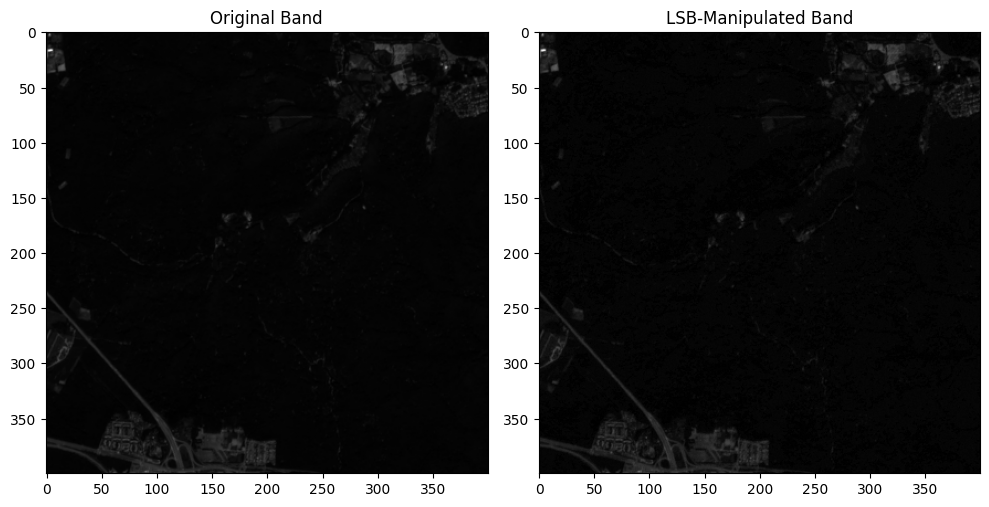

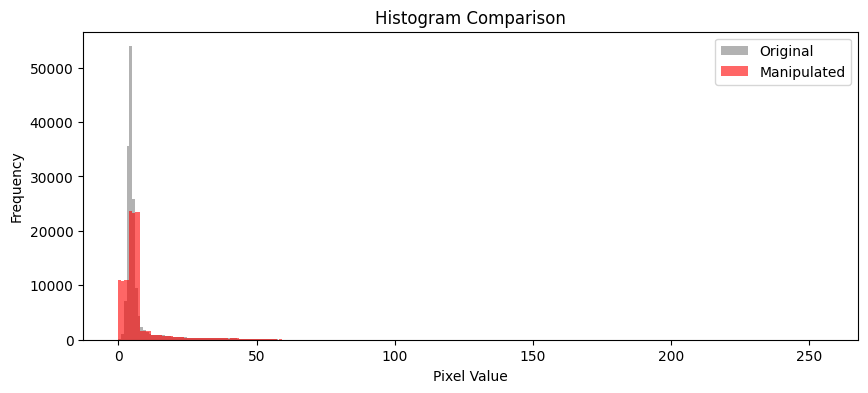

Mean pixel difference: 1.3235
Max pixel difference: 3


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# b4, b3, b2 10m Sentinel-2 bands (uint16) for this example, let's normalize them to 8-bit
def normalize_to_uint8(band):
    band = band.astype(float)
    band = (band - band.min()) / (band.max() - band.min()) * 255
    return band.astype(np.uint8)

b4_8 = normalize_to_uint8(b4)
b3_8 = normalize_to_uint8(b3)
b2_8 = normalize_to_uint8(b2)


orig = b4_8.copy()

# --- Steganographic manipulation ---
rng = np.random.default_rng()
random_bits = rng.integers(0, 4, size=orig.shape, dtype=np.uint8)  # 2 bits -> values 0-3

# Clear last 2 bits (AND with 11111100 = 252)
manip = (orig & 0b11111100) | random_bits

# --- Visual comparison ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(orig, cmap='gray')
plt.title("Original Band")

plt.subplot(1,2,2)
plt.imshow(manip, cmap='gray')
plt.title("LSB-Manipulated Band")
plt.tight_layout()
plt.show()

# --- Histograms (PDFs) ---
plt.figure(figsize=(10,4))
plt.hist(orig.flatten(), bins=256, alpha=0.6, label='Original', color='gray')
plt.hist(manip.flatten(), bins=256, alpha=0.6, label='Manipulated', color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram Comparison')
plt.show()

# --- Quantitative difference ---
diff = np.abs(orig.astype(int) - manip.astype(int))
print("Mean pixel difference:", diff.mean())
print("Max pixel difference:", diff.max())


The modified image looked identical to the original — small 0–3 DN changes in 8-bit data are invisible to the eye.
However, its histogram became smoother and slightly noisier, showing that randomizing the least significant bits alters pixel statistics.
The average pixel difference (about 1–2 DN) is minimal visually but detectable through histogram or statistical analysis, meaning subtle manipulations can be identified even when they’re not visible.